# INDIAN START-UP ECOSYSTEM PROJECT

## Business Understanding

In this project, I am going to focus on the details of funding for these start-ups in India, where I will dive deep into a data containing all the details about fundings received by the start-ups, from 2018 to 2021 and communicate my findings and recommendations to the team in the best way possible.

Some hypotheses I will be testing for this project are as follows;
I will be getting deep into Hypothesis testing later in the project (Outlining the Null and Alternate Hypotheses)

1. Companies with multiple founders are likely to receive higher amounts of funding in India.

2. Sector of the start-up contributes to funding amount.

3. Startup headquarters/location contributes to funding amount.

4. The number of investors affect the funding amount.




I will be focusing on answering the following  business questions:

### Yearly Analysis

- what is the overall trend in funding amounts over the specified time period? 
   - Average and Total funding amount per year
   - Which year had the highest total and average funding amount?

### Analysis by Sector 

- What are the top 5 and botton 5 start-ups according to funding amount and Which sectors are they from?

- Total and Average funding amount by sectors during this timeframe
   - Which sectors has the highest total and average funding during this timeframe?
   - Which sectors has the lowest total and average funding during this timeframe?

- What is the number of fundings by sectors?

### Analysis by location/region

- Total and average funding amounts by locations during this timeframe
   - Which regions have the highest total and average funding during this timeframe?
   - Which regions have the lowest total and average funding during this timeframe?

- What is the number of fundings for each region?

### Analysis by Stages

- Is there a relationship between the development Stage of the startup and the funding it received?

- What is the average number of fundings for each stage?

- What is the average funding amount for each stage?

- What is the Total funding amount per each stage?

### Founder-based Analysis

- How many founders are associated with each company?

- Is there a relationship between the number of founders and the funding amount received?

## Data Understanding and Preparation

### Installing the needed libraries

Fisrt I go ahead to install all the required libraries

In [409]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

### Initializing environment variables

To connect to one of the data sources(a database) I'll be working with, I need some credentials (username, password etc.) which cannot be shared or cannot be shown to the public, therefore I need to create a .env file which is going to house the environment variables. This environment variable will be used in creating a connection string to help connect to the database.

In [410]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database=environment_variables.get("DATABASE")
server=environment_variables.get("SERVER")
login=environment_variables.get("LOGIN")
password=environment_variables.get("PASSWORD")

# creating connection to database
connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={login};PWD={password}"

In [411]:
# Using the connect method of the pyodbc library, I go ahead to pass in the connection string.
# This will connect to the server

connection=pyodbc.connect(connection_string)

## Data Understanding and Preparation

The data for this project will be extracted from 3 different sources, as funding data for 2020 and 2021 are hosted on an SQL Server database, funding data for 2018 is hosted in a Github repository and 2019's funding data is hosted on a OneDrive.

First, I connect to the database to see the tables contained in it. I then go ahead to extract the data for 2020 and 2021 by assigning them appropriate variable names.

Data hosted on Github and OneDrive were downloaded to my local storage and then read in from there. 2018's data as a CSV file while data for 2019 is an excel file.

below are the common fields/columns for 2019, 2020 and 2021 and their descriptions

| Field           | Description                                                     |
|-----------------|-----------------------------------------------------------------|
| Company_Brand   | Name of start-up company                                        |
| Founded         | Year it was founded                                             |
| HeadQuarter     | Headquarters or location of the company                         |
| Sector          | Sector of the company                                           |
| What_it_does    | A brief description of what the company does                    |
| Founders        | Name(s) of the founder(s) of the company                        |
| Investor        | Name(s) of the investor(s) of the company                       |
| Amount          | Amount invested into the company by investor(s)                 |
| Stage           | Current stage of the startup (e.g. Pre-seed, Pre-series, Series A, Series D) |


2018 had different column names but most had the same meaning as the columns for 2019, 2020 and 2021

| Field           | Description                                                     |
|-----------------|-----------------------------------------------------------------|
| Company Name    | Name of start-up company                                        |
| Industry        | Sector of the company                                           |
| Round/Series    | Current stage of the startup                                    |
| Amount          | Amount invested into the company by investor(s)                 |
| Location        | Headquarters or location of the company                         |
| About Company   | A brief description of what the company does                    |            



A year column will be later added to data during data preparation. Now Because 2019,2020 and 2020 have similar or the same columns, columns for 2018 will changed to look just like the other 3 so as to make concatenation easy. The columns for the other 3 might also be tweaked to meet the requirements.



In [412]:
# Let's see have a look at the tables in the database
query = ''' SELECT *
            FROM INFORMATION_SCHEMA.TABLES
            WHERE TABLE_TYPE = 'BASE TABLE' '''

tables=pd.read_sql(query,connection)
print(tables)


  TABLE_CATALOG TABLE_SCHEMA               TABLE_NAME  TABLE_TYPE
0         dapDB          dbo  LP1_startup_funding2021  BASE TABLE
1         dapDB          dbo  LP1_startup_funding2020  BASE TABLE






As seen above, the database contains two tables namely LP1_startup_funding2020 which contains data for 2020 and then LP1_startup_funding2021 which contains data for 2021.

Now I will go ahead to read the data into pandas dataframe separately and assign them to variable names which are self-descriptive

#### Reading data for all years into pandas dataframe separately

In [413]:

#first we assign the data for 2020 to a variable 'data_2020'

query="Select * from dbo.LP1_startup_funding2020"
data_2020=pd.read_sql(query,connection)

data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [414]:
#then assign the data for 2021 to a variable 'data_2021'

query="Select * from dbo.LP1_startup_funding2021"
data_2021=pd.read_sql(query,connection)

data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


I have been able to retrieve the data for 2020 and 2021. Now in the next steps, I go ahead to download the data for 2018 called startup_funding2018.csv, which is stored in a github repository. Alternatively, one can connect to the data using a url.

Data for 2019 was downloaded from OneDrive on to my local storage and read into pandas dataframe from there.

In [415]:
# reading in data for 2018
data_2018=pd.read_csv('startup_funding2018.csv')
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [416]:
# reading in data for 2019
data_2019=pd.read_excel('startup_funding2019.xlsx')
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000,NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000,Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000,Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000,Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000,NaN


## Data Cleaning

The data cleaning process was done with the help of Excel opened on the side to show all values at once, whiles all the action went on in here. Since 2018's data is the odd one among the three (in terms of column names and values contained in them), I started with that one

#### 2018 data cleaning

In [417]:
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [418]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [419]:
# check for null values
data_2018.isna().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

In [420]:
# Feature engineering and renaming column names for 2018
data_2018['Year']=2018
data_2018['Founded']= np.nan # creating a founders column and filling with Null values

# changing the column names for 2018
data_2018= data_2018.rename(columns={'Company Name': 'Company/Brand'})
data_2018= data_2018.rename(columns={'Industry': 'Sector'})
data_2018= data_2018.rename(columns={'Location': 'HeadQuarter'})
data_2018= data_2018.rename(columns={'Amount': 'Amount($)'})
data_2018= data_2018.rename(columns={'Round/Series': 'Stage'})

# Dropping the 'About Company' column
#data_2018.drop('About Company',axis=1,inplace=True)

#### Cleaning the 'Sector' column

In [421]:
data_2018.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,About Company,Year,Founded
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN


In [422]:
# Checking for empty values entered as '-' in the sector column
empty_sector_bool = data_2018['Sector'] == '—'
empty_sector = data_2018.loc[empty_sector_bool]
empty_sector

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,About Company,Year,Founded
58,MissMalini Entertainment,—,Seed,"₹104,000,000","Mumbai, Maharashtra, India",MissMalini Entertainment is a multi-platform n...,2018,NaN
105,Jagaran Microfin,—,Debt Financing,"₹550,000,000","Kolkata, West Bengal, India",Jagaran Microfin is a Microfinance institution...,2018,NaN
121,FLEECA,—,Seed,—,"Jaipur, Rajasthan, India",FLEECA is a Tyre Care Provider company.,2018,NaN
146,WheelsEMI,—,Series B,"$14,000,000","Pune, Maharashtra, India","WheelsEMI is the brand name of NBFC, WheelsEMI...",2018,NaN
153,Fric Bergen,—,Venture - Series Unknown,—,"Alwar, Rajasthan, India",Fric Bergen is a leader in the specialty food ...,2018,NaN
174,Deftouch,—,Seed,—,"Bangalore, Karnataka, India",Deftouch is a mobile game development company ...,2018,NaN
181,Corefactors,—,Seed,—,"Bangalore, Karnataka, India","Corefactors is a leading campaign management, ...",2018,NaN
210,Cell Propulsion,—,Seed,"₹7,000,000","Bangalore, Karnataka, India",Cell Propulsion is an electric mobility startu...,2018,NaN
230,Flathalt,—,Angel,50000,"Gurgaon, Haryana, India",FInd your Customized Home here.,2018,NaN
235,dishq,—,Seed,400000,"Bengaluru, Karnataka, India",dishq leverages food science and machine learn...,2018,NaN


In [423]:
# checking how many rows has empty sector
empty_sector.shape[0]

30

So in all, only 30 rows has missing values in the sector column. Now I will use the 'About Company' which talks about what the company does to assign all these 30 rows their appropriate sectors

In [424]:
empty_sector[['Sector', 'About Company']]

,Sector,About Company
58,—,MissMalini Entertainment is a multi-platform n...
105,—,Jagaran Microfin is a Microfinance institution...
121,—,FLEECA is a Tyre Care Provider company.
146,—,"WheelsEMI is the brand name of NBFC, WheelsEMI..."
153,—,Fric Bergen is a leader in the specialty food ...
174,—,Deftouch is a mobile game development company ...
181,—,"Corefactors is a leading campaign management, ..."
210,—,Cell Propulsion is an electric mobility startu...
230,—,FInd your Customized Home here.
235,—,dishq leverages food science and machine learn...


In [425]:
# Filling them in manually
data_2018.loc[58, 'Sector'] = 'Entertainment'
data_2018.loc[105, 'Sector'] = 'Finance'
data_2018.loc[121, 'Sector'] = 'Automotive'
data_2018.loc[146, 'Sector'] = 'Automotive'
data_2018.loc[153, 'Sector'] = 'Food'
data_2018.loc[174, 'Sector'] = 'Technology'
data_2018.loc[181, 'Sector'] = 'Finance'
data_2018.loc[210, 'Sector'] = 'Automotive'
data_2018.loc[230, 'Sector'] = 'Real Estate'
data_2018.loc[235, 'Sector'] = 'Technology'
data_2018.loc[238, 'Sector'] = 'Technology'
data_2018.loc[242, 'Sector'] = 'Real Estate'
data_2018.loc[243, 'Sector'] = 'Technology'
data_2018.loc[247, 'Sector'] = 'Technology'
data_2018.loc[251, 'Sector'] = 'Wellness'
data_2018.loc[257, 'Sector'] = 'Marketing'
data_2018.loc[258, 'Sector'] = 'Marketing'
data_2018.loc[259, 'Sector'] = 'E-Commerce'
data_2018.loc[257, 'Sector'] = 'Marketing'
data_2018.loc[294, 'Sector'] = 'Transportation'
data_2018.loc[325, 'Sector'] = 'Technology'
data_2018.loc[326, 'Sector'] = 'Finance'
data_2018.loc[346, 'Sector'] = 'Finance'
data_2018.loc[398, 'Sector'] = 'Finance'
data_2018.loc[457, 'Sector'] = 'Agriculture'
data_2018.loc[472, 'Sector'] = 'Technology'
data_2018.loc[473, 'Sector'] = 'Technology'
data_2018.loc[476, 'Sector'] = 'Technology'
data_2018.loc[478, 'Sector'] = 'Wellness/Beauty'
data_2018.loc[480, 'Sector'] = 'Hospitality'
data_2018.loc[510, 'Sector'] = 'Technology'

Since there are a lot of rows in the 'Sector' column with multiple values, I'll create a list containing all those rows

In [426]:
multiple_sectors = [sect for sect in list(data_2018['Sector']) if ',' in sect]
multiple_sectors

['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
 'Agriculture, Farming',
 'Credit, Financial Services, Lending, Marketplace',
 'Financial Services, FinTech',
 'E-Commerce Platforms, Retail, SaaS',
 'Cloud Infrastructure, PaaS, SaaS',
 'Internet, Leisure, Marketplace',
 'Information Services, Information Technology',
 'B2B, Shoes',
 'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
 'Automotive, Search Engine, Service Industry',
 'Finance, Internet, Travel',
 'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
 'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
 'Internet of Things, Waste Management',
 'Air Transportation, Freight Service, Logistics, Marine Transportation',
 'Enterprise Software, Health Care, Hospital, Parenting, Personal Health, SaaS',
 'Agriculture, Analytics, Big Data, Farming',
 'Logistics, Supply Chain Management',
 'Financial Services,

There are a lot of rows in the 'Sector' column that contains more than one sector

In [427]:
# create a list of substrings
tech = ['Mobile','Technology', 'Internet', 'Software', 'Hardware','SaaS','Blockchain','Apps','Information Services','SEM',
        'Artificial Intelligence','CleanTech','Aerospace','Robotics','Ai','PaaS','Medtech','Agritech','HR tech',
       'Tech','FoodTech','Safety tech','IoT','Legal tech','Infratech','Netwokring platform','Telecommunication','Cloud','Aero',
       'Virtual','Content','Photonics','app','Proptech','Deeptech','AR','VR','Agri tech','-Tech','AgriTech','IT','Network',
        'Data','HrTech','Foodtech','Spacetech','E-mobility','Automation','Logitech','HRTech','Drone','MLOps','Innovation',
       'BioTechnology','TaaS','network','equipment','SpaceTech','CRM','MarTech','Nanotechnology','Femtech','startup','AI']
fin = ['Lending','Finance','Insurance', 'Payments','Financial Services','Credit','Credit Cards','Mutual Funds',
       'Banking','Escrow','Venture','financial','Taxation','Capital','firm','Equity']
fint = ['NFT','Virtual Banking','FinTech','Fintech','Cryptocurrency','Crypto','Insurtech','InsurTech']
health = ['Health', 'Medical','Pharmaceutical','Health Diagnotics','Health Care','Hospital','Biotechnology','Biopharma',
         'Hygiene management','HealthTech','Healthcare','HealthCare','laboratory','Biotech','Healthtech','HeathTech',
         'Helathcare','Veterinary']
mkt = ['Brand Marketing','Marketing','Event Promotion','Market']
agric = ['Farming','Agriculture','Nutrition','Hauz Khas','Fishery']
con = ['Food','Food and Beverages','Dairy','Beverages','Beer','FMCG']
econ = ['B2B','Shopping','E-Commerce','Trading Platform','E-commerce','E-marketplace','marketplace','e-commerce','Ecommerce',
        'E-market','Commerce','Trading platform']
cons = ['Wholesale','Consumer','Shoes','Packaging','Retail','Consulting','Food Delivery']
edu = ['E-Learning','EdTech','Education','Communities','Edtech','Preschool','School']
welln = ['Lifestyle','Beauty','Wellness','Cosmetics','Yoga','Skincare','D2C','Fitness','Lifestyle','Training']
real_est=['Real Estate','Home Decor','Accomodation','Interior design','Home Design','Home interior','Co-living',
          'Construction']
log = ['Logistics','Rental','Tourism','Travel','TravelTech','Transport','Transportation','Aviation','Mobility']

auto = ['Automotive','Electric vehicle','Industrial Automation','Vehicles','Automotive tech','Automobile','Tyre','car','Car',
       'Vehicle','Mechanical']
manu = ['Manufacturing']
ener = ['Renewable Energy','Solar','Energy','Energy Storage','Battery','Oil and Gas','Renewable','EV','Electricity',
       'purification','Renewables']
medi = ['Entertainment','Media','News','Video','Digital Media','FM','Publication','OTT','Social Network','Music',
        'Digital platform','Podcast','publishing','Blogging']
game = ['Gaming','Games','Sports']

style = ['Fashion','Jewelry','Eyeglasses','Eye Wear','Apparel','Dating','Celebrity','Eyewear','D2C Fashion','Matrimony',
         'Textiles','D2C jewellery','Foootwear','Arts']
hos =['Hospitality','Hotel','Leisure']

# create a new_sector column
data_2018['new_sector'] = 'Other'

# Use str.contains to create a mask for rows where 'Sector' contains any of the terms
# Join the terms in 'tech' with '|' to create a regex pattern
data_2018.loc[data_2018['Sector'].str.contains('|'.join(tech)), 'new_sector'] = 'Technology'
data_2018.loc[data_2018['Sector'].str.contains('|'.join(fin)), 'new_sector'] = 'Finance'
data_2018.loc[data_2018['Sector'].str.contains('|'.join(health)), 'new_sector'] = 'Healthcare'
data_2018.loc[data_2018['Sector'].str.contains('|'.join(mkt)), 'new_sector'] = 'Marketing'
data_2018.loc[data_2018['Sector'].str.contains('|'.join(agric)), 'new_sector'] = 'Agriculture'
data_2018.loc[data_2018['Sector'].str.contains('|'.join(econ)), 'new_sector'] = 'E-Commerce'
data_2018.loc[data_2018['Sector'].str.contains('|'.join(edu)), 'new_sector'] = 'Education'
data_2018.loc[data_2018['Sector'].str.contains('|'.join(welln)), 'new_sector'] = 'Wellness/Beauty'
data_2018.loc[data_2018['Sector'].str.contains('|'.join(real_est)), 'new_sector'] = 'Real Estate'
data_2018.loc[data_2018['Sector'].str.contains('|'.join(log)), 'new_sector'] = 'Logistics'

data_2018.loc[data_2018['Sector'].str.contains('|'.join(auto)), 'new_sector'] = 'Automotive'
data_2018.loc[data_2018['Sector'].str.contains('|'.join(manu)), 'new_sector'] = 'Manufacture'
data_2018.loc[data_2018['Sector'].str.contains('|'.join(ener)), 'new_sector'] = 'Energy'
data_2018.loc[data_2018['Sector'].str.contains('|'.join(medi)), 'new_sector'] = 'Media/Entertainment'
data_2018.loc[data_2018['Sector'].str.contains('|'.join(hos)), 'new_sector'] = 'Hospitality'
data_2018.loc[data_2018['Sector'].str.contains('|'.join(style)), 'new_sector'] = 'Lifestyle'
data_2018.loc[data_2018['Sector'].str.contains('|'.join(cons)), 'new_sector'] = 'Consumer Services'
data_2018.loc[data_2018['Sector'].str.contains('|'.join(game)), 'new_sector'] = 'Gaming'
data_2018.loc[data_2018['Sector'].str.contains('|'.join(fint)), 'new_sector'] = 'FinTech'
data_2018.loc[data_2018['Sector'].str.contains('|'.join(con)), 'new_sector'] = 'Consumables'

In [428]:
data_2018.drop('Sector',axis=1,inplace=True)
data_2018= data_2018.rename(columns={'new_sector': 'Sector'})

In [429]:
data_2018.head()


,Company/Brand,Stage,Amount($),HeadQuarter,About Company,Year,Founded,Sector
0,TheCollegeFever,Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,Marketing
1,Happy Cow Dairy,Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,Agriculture
2,MyLoanCare,Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN,Marketing
3,PayMe India,Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,FinTech
4,Eunimart,Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,Consumer Services


#### Cleaning the 'Amount($)' column



In [430]:
# The below function takes in an argument 'amt'

def clean_amount(amt):
    # check whether it's a missing value ('NaN' or 'None') and replaces with 'NaN'
    if (pd.isnull(amt)) or (amt == '—'):
        return np.nan
    # checks whether the value passed in as the argument is an integer data type and converts it to string
    elif isinstance(amt, int):
        return str(amt)
    # checks whether the value has a dollar sign in it and returns the same value
    elif '$' in amt:
        return amt
    # checks whether the value has the rupee sign it in and convert it to dollars with the appropriate exchange rate
    elif '₹' in amt:
        return '$' + str(round(int(amt.split('₹')[1].replace(',', '')) / 68.41, 2))
    else:
    # if none of the conditions are satisfied, convert it o dollars anyway
        return '$' + str(int(amt) / 68.41)

now i go ahead to apply function on the 'Amount($)' column

In [431]:


data_2018['Amount($)'] = data_2018['Amount($)'].apply(clean_amount)

In [432]:
data_2018[['Amount($)']].head(10)

,Amount($)
0,$3654.436485893875
1,$584709.84
2,$950153.49
3,$29235.491887151
4,NaN
5,$23388.3935097208
6,$233883.94
7,$730887.3
8,NaN
9,NaN


Now that all values has been converted to dollar and all inapprioprate entries has been converted to the recognized misssing values ('NaN'), I get rid of the dollar signs

In [433]:
data_2018['Amount($)'] = data_2018['Amount($)'].str.replace('$', '', regex=False)
data_2018['Amount($)'] = pd.to_numeric(data_2018['Amount($)'], errors='coerce')

In [434]:
data_2018['Amount($)'].head()

0      3654.436486
1    584709.840000
2    950153.490000
3     29235.491887
4              NaN
Name: Amount($), dtype: float64

In [435]:
# now fill the missing values in the amount column with the median
data_2018['Amount($)'] = data_2018['Amount($)'].fillna(data_2018['Amount($)'].median())

# convert it the column to integer
data_2018['Amount($)'] = data_2018['Amount($)'].astype(int)

In [436]:
data_2018.isna().sum()

Company/Brand      0
Stage              0
Amount($)          0
HeadQuarter        0
About Company      0
Year               0
Founded          526
Sector             0
dtype: int64

#### Cleaning 'Stage' column

In [437]:
data_2018.Stage.unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

There are a lot of values in the 'Stage' column that are not valid stages of a startup, therefore I will deal with this by creating a list of the valid stages and makes sure to convert the invalid ones to null values which will later be dealt with

In [438]:
valid_stages = ['Venture - Series Unknown','Seed', 'Angel', 'Series A', 'Series B', 'Pre-Seed', 'Grant', 'Series H', 
                'Series A', 'Series C', 'Series E', 'Corporate Round','Series D','Debt financing','Post-IPO Equity']

data_2018.loc[~data_2018['Stage'].isin(valid_stages), 'Stage'] = np.nan

In [439]:
# now i go ahead to fill the missing values with the most occuring value(mode)
data_2018['Stage'].fillna(data_2018['Stage'].mode(), inplace=True)

In [440]:
data_2018.head()

,Company/Brand,Stage,Amount($),HeadQuarter,About Company,Year,Founded,Sector
0,TheCollegeFever,Seed,3654,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,Marketing
1,Happy Cow Dairy,Seed,584709,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,Agriculture
2,MyLoanCare,Series A,950153,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN,Marketing
3,PayMe India,Angel,29235,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,FinTech
4,Eunimart,Seed,116941,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,Consumer Services


#### Cleaning 'HeadQuarter' column

The 'HeadQuarter' column contains some values we find irrelevant(e.g. the country 'India'), I jsut want the one word as location so I am going to take only the first words

In [441]:
data_2018['HeadQuarter'] = data_2018['HeadQuarter'].apply(lambda x: x.split(',')[0])
data_2018.head()

,Company/Brand,Stage,Amount($),HeadQuarter,About Company,Year,Founded,Sector
0,TheCollegeFever,Seed,3654,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,Marketing
1,Happy Cow Dairy,Seed,584709,Mumbai,A startup which aggregates milk from dairy far...,2018,NaN,Agriculture
2,MyLoanCare,Series A,950153,Gurgaon,Leading Online Loans Marketplace in India,2018,NaN,Marketing
3,PayMe India,Angel,29235,Noida,PayMe India is an innovative FinTech organizat...,2018,NaN,FinTech
4,Eunimart,Seed,116941,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,NaN,Consumer Services


In [442]:
data_2018['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow'],
      dtype=object)

In [443]:
# making the necessary changes
# replace "Bengaluru" with "Bangalore" in the "headquarter" column
data_2018['HeadQuarter'] = data_2018['HeadQuarter'].str.replace('Bengaluru', 'Bangalore')
data_2018['HeadQuarter'] = data_2018['HeadQuarter'].str.replace('Bangalore City', 'Bangalore')
data_2018['HeadQuarter'] = data_2018['HeadQuarter'].str.replace('New Delhi', 'Delhi')
data_2018['HeadQuarter'] = data_2018['HeadQuarter'].str.replace('Gurgaon', 'Gurugram')

### 2019 data cleaning

In [444]:
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000,NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000,Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000,Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000,Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000,NaN


In [445]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [446]:
data_2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [447]:
data_2019['Year']=2019

In [448]:
# Let's look at where sector is empty
data_2019.loc[(data_2019['Sector'].isna()==True)]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
41,VMate,NaN,NaN,NaN,A short video platform,NaN,Alibaba,100000000,NaN,2019
49,Awign Enterprises,2016.0,Bangalore,NaN,It supplies workforce to the economy,"Annanya Sarthak, Gurpreet Singh, Praveen Sah","Work10M, Michael and Susan Dell Foundation, Ea...",4000000,Series A,2019
52,TapChief,2016.0,Bangalore,NaN,It connects individuals in need of advice in a...,"Shashank Murali, Binay Krishna, Arjun Krishna",Blume Ventures.,1500000,Pre series A,2019
56,KredX,NaN,Bangalore,NaN,Invoice discounting platform,Manish Kumar,Tiger Global Management,26000000,Series B,2019
57,m.Paani,NaN,Mumbai,NaN,It digitizes and organises local retailers,Akanksha Hazari,"AC Ventures, Henkel",5500000,Series A,2019


With the help of the 'What it does' column, I will manually enter values for the missing rows in 'Sector'

In [449]:
data_2019.loc[41, 'Sector'] = 'Media'
data_2019.loc[49, 'Sector'] = 'Human Resources'
data_2019.loc[52, 'Sector'] = 'Technology'
data_2019.loc[56, 'Sector'] = 'Technology'
data_2019.loc[57, 'Sector'] = 'E-Commerce'

In [450]:
# Now I will go ahead and use the substrings I created to earlier for the 'Sector' column to enter new sectors for 2019
data_2019['sector_new'] = 'Other'
data_2019.loc[data_2019['Sector'].str.contains('|'.join(tech)), 'sector_new'] = 'Technology'
data_2019.loc[data_2019['Sector'].str.contains('|'.join(fin)), 'sector_new'] = 'Finance'
data_2019.loc[data_2019['Sector'].str.contains('|'.join(health)), 'sector_new'] = 'Healthcare'
data_2019.loc[data_2019['Sector'].str.contains('|'.join(mkt)), 'sector_new'] = 'Marketing'
data_2019.loc[data_2019['Sector'].str.contains('|'.join(agric)), 'sector_new'] = 'Agriculture'
data_2019.loc[data_2019['Sector'].str.contains('|'.join(econ)), 'sector_new'] = 'E-Commerce'
data_2019.loc[data_2019['Sector'].str.contains('|'.join(edu)), 'sector_new'] = 'Education'
data_2019.loc[data_2019['Sector'].str.contains('|'.join(welln)), 'sector_new'] = 'Wellness/Beauty'
data_2019.loc[data_2019['Sector'].str.contains('|'.join(real_est)), 'sector_new'] = 'Real Estate'
data_2019.loc[data_2019['Sector'].str.contains('|'.join(log)), 'sector_new'] = 'Logistics'

data_2019.loc[data_2019['Sector'].str.contains('|'.join(auto)), 'sector_new'] = 'Automotive'
data_2019.loc[data_2019['Sector'].str.contains('|'.join(manu)), 'sector_new'] = 'Manufacture'
data_2019.loc[data_2019['Sector'].str.contains('|'.join(ener)), 'sector_new'] = 'Energy'
data_2019.loc[data_2019['Sector'].str.contains('|'.join(medi)), 'sector_new'] = 'Media/Entertainment'
data_2019.loc[data_2019['Sector'].str.contains('|'.join(hos)), 'sector_new'] = 'Hospitality'
data_2019.loc[data_2019['Sector'].str.contains('|'.join(style)), 'sector_new'] = 'Lifestyle'
data_2019.loc[data_2019['Sector'].str.contains('|'.join(cons)), 'sector_new'] = 'Consumer Services'
data_2019.loc[data_2019['Sector'].str.contains('|'.join(game)), 'sector_new'] = 'Gaming'
data_2019.loc[data_2019['Sector'].str.contains('|'.join(fint)), 'sector_new'] = 'FinTech'
data_2019.loc[data_2019['Sector'].str.contains('|'.join(con)), 'sector_new'] = 'Consumables'

In [451]:
data_2019.drop('Sector',axis=1,inplace=True)
data_2019= data_2019.rename(columns={'sector_new': 'Sector'})

In [452]:
# Impute missing values for 'HeadQuarters', 'Founder' and 'Stage' 
data_2019['HeadQuarter'] = data_2019['HeadQuarter'].fillna(data_2019['HeadQuarter'].mode()[0])
data_2019['Stage'] = data_2019['Stage'].fillna(data_2019['Stage'].mode()[0])
data_2019['Founders'] = data_2019['Founders'].fillna(data_2019['Founders'].mode()[0])

In [453]:
# Replace a value in 'HeadQuarters'
data_2019['HeadQuarter'] = data_2019['HeadQuarter'].str.replace('New Delhi', 'Delhi')

In [454]:
data_2019['Founded'].unique()

array([  nan, 2014., 2004., 2013., 2010., 2018., 2019., 2017., 2011.,
       2015., 2016., 2012., 2008.])

In [455]:
data_2019['Founded'] = data_2019['Founded'].replace('nan', np.nan)

In [456]:
data_2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter       0
What it does      0
Founders          0
Investor          0
Amount($)         0
Stage             0
Year              0
Sector            0
dtype: int64

In [457]:
data_2019['Founded'].fillna(data_2019['Founded'].median(), inplace=True)

In [458]:
data_2019.isnull().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
What it does     0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
Sector           0
dtype: int64

In [459]:
data_2019['Amount($)']

0       6300000
1     150000000
2      28000000
3      30000000
4       6000000
        ...    
84     20000000
85    693000000
86      5000000
87     50000000
88     33000000
Name: Amount($), Length: 89, dtype: object

In [460]:
data_2019['Amount($)'].unique()

array([6300000, 150000000, 28000000, 30000000, 6000000, 'Undisclosed',
       1000000, 20000000, 275000000, 22000000, 5000000, 140500, 540000000,
       15000000, 182700, 12000000, 11000000, 15500000, 1500000, 5500000,
       2500000, 140000, 230000000, 49400000, 32000000, 26000000, 150000,
       400000, 2000000, 100000000, 8000000, 100000, 50000000, 120000000,
       4000000, 6800000, 36000000, 5700000, 25000000, 600000, 70000000,
       60000000, 220000, 2800000, 2100000, 7000000, 311000000, 4800000,
       693000000, 33000000], dtype=object)

In [461]:
data_2019[(data_2019['Amount($)'] == 'Undisclosed')]

,Company/Brand,Founded,HeadQuarter,What it does,Founders,Investor,Amount($),Stage,Year,Sector
5,FlytBase,2015.0,Pune,A drone automation platform,Nitin Gupta,Undisclosed,Undisclosed,Series A,2019,Technology
6,Finly,2015.0,Bangalore,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",Undisclosed,Series A,2019,Technology
10,Cub McPaws,2010.0,Mumbai,A B2C brand that focusses on premium and comf...,"Abhay Bhat, Kinnar Shah",Venture Catalysts,Undisclosed,Series A,2019,E-Commerce
14,Open Secret,2015.0,Bangalore,It produces and sells top quality snacks,"Ahana Gautam, Udit Kejriwal",Matrix Partners,Undisclosed,Series A,2019,Consumables
19,Azah Personal Care Pvt. Ltd.,2018.0,Gurugram,Aims to solve some problems in the feminine hy...,"Mohammed, Shashwat Diesh","Kunal Bahl, Rohit Bansal.",Undisclosed,Pre series A,2019,Healthcare
23,DROR Labs Pvt. Ltd,2018.0,Delhi,It uses technology to create a trust-based net...,"Dhiraj Naubhar, Dheeraj Bansal",Inflection Point Ventures,Undisclosed,Series A,2019,Technology
32,Pumpkart,2014.0,Chandigarh,B2B model for appliances and electrical products,KS Bhatia,Dinesh Dua,Undisclosed,Series A,2019,E-Commerce
45,Afinoz,2015.0,Noida,Online financial marketplace for customized ra...,Rachna Suneja,Fintech innovation lab,Undisclosed,Series A,2019,FinTech
54,Ninjacart,2015.0,Bangalore,It connects producers of food directly to reta...,"Thirukumaran Nagarajanin, Vasudevan Chinnathambi","Walmart, Flipkart",Undisclosed,Series A,2019,E-Commerce
55,Binca Games,2014.0,Mumbai,It offers games that are available across Indi...,"Rubianca Wadhwa, Sahil Wadhwa",Sunil Gavaskar,Undisclosed,Series A,2019,Gaming


Before I go ahead to impute the undisclosed values, I will have a look at the distribution of the amount first

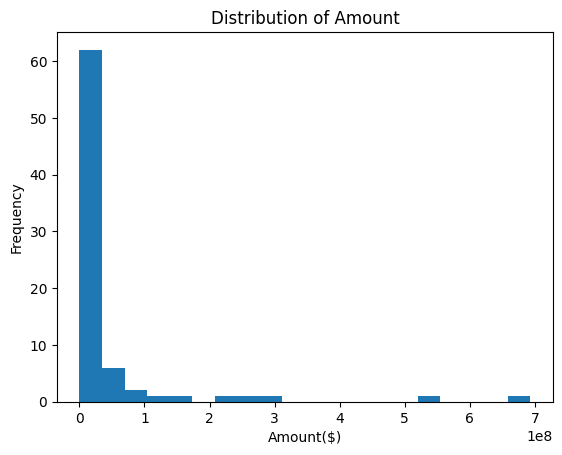

In [462]:
# First replace 'Undisclosed' with 'NaN'
data_2019['Amount($)']=data_2019['Amount($)'].replace('Undisclosed', np.nan)


# First change the, to numeric type
data_2019['Amount($)'] = pd.to_numeric(data_2019['Amount($)'])

# Create a histogram of the 'Amount' column
plt.hist(data_2019['Amount($)'], bins=20)
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.ylabel('Frequency')
plt.show()

Looking at the distribution of the 'Amount' column it wouldn't make sense to impute the missing values with the mean as it will be affected by outliers, therefore we can go ahead and use the median since it is immune to outliers

In [463]:
data_2019['Amount($)'] = data_2019['Amount($)'].fillna(data_2019['Amount($)'].median())
data_2019['Amount($)'] = data_2019['Amount($)'].astype(int)

In [464]:
data_2019.isna().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
What it does     0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
Sector           0
dtype: int64

#### 2020 data cleaning

In [465]:
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [466]:
data_2020.isna().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [467]:
data_2020.drop('column10', axis=1, inplace=True)

In [468]:
data_2020['Sector'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [469]:
data_2020[(data_2020['Sector'].isna()==True)]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
518,Text Mercato,2015.0,Bangalore,None,Cataloguing startup that serves ecommerce plat...,"Kiran Ramakrishna, Subhajit Mukherjee",1Crowd,649600.0,Series A
569,Magicpin,2015.0,Gurugram,None,"It is a local discovery, rewards, and commerce...","Anshoo Sharma, Brij Bhushan",Samsung Venture Investment Corporation,7000000.0,Series D
687,Leap Club,NaN,Gurugram,None,Community led professional network for women,"Ragini Das, Anand Sinha","Whiteboard Capital, FirstCheque, Artha India V...",340000.0,Pre seed round
699,Juicy Chemistry,2014.0,None,None,It focuses on organic based skincare products,Pritesh Asher,Akya Ventures,650000.0,Series A
707,Magicpin,2015.0,Gurugram,None,"It is a local discovery, rewards, and commerce...","Anshoo Sharma, Brij Bhushan",Lightspeed Venture Partners,3879000.0,None
732,Servify,NaN,Mumbai,None,It is a technology company which serves as a p...,Sreevathsa Prabhakar,Barkawi,250000.0,None
746,Wagonfly,2018.0,Bangalore,None,Contactless shopping and delivery experience b...,Raghavendra Prasad,Investment Trust of India,500000.0,None
763,DrinkPrime,NaN,Bangalore,None,Water purifier subscription service,"Manas Ranjan Hota, Vijender Reddy","Abhishek Goyal, Bharat Jaisinghani, FirstCheque",NaN,Seed Round
809,Kitchens Centre,2019.0,Delhi,None,Offers solutions to cloud kitchens by providin...,Lakshay Jain,AngelList India,500000.0,Seed Round
918,Innoviti,NaN,Bangalore,None,Digital payments solutions company,Rajeev Agrawal,FMO,5000000.0,None


In [470]:
data_2020.loc[518, 'Sector'] = 'E-Commerce'
data_2020.loc[569, 'Sector'] = 'E-Commerce'
data_2020.loc[687, 'Sector'] = 'Social Work'
data_2020.loc[699, 'Sector'] = 'Beauty&Wellness'
data_2020.loc[707, 'Sector'] = 'E-Commerce'
data_2020.loc[732, 'Sector'] = 'Technology'
data_2020.loc[746, 'Sector'] = 'E-Commerce'
data_2020.loc[763, 'Sector'] = 'E-Commerce'
data_2020.loc[746, 'Sector'] = 'E-Commerce'
data_2020.loc[809, 'Sector'] = 'Technology'
data_2020.loc[918, 'Sector'] = 'Fintech'
data_2020.loc[926, 'Sector'] = 'Real Estate'
data_2020.loc[1012, 'Sector'] = 'Technology'
data_2020.loc[1031, 'Sector'] = 'Technology'
data_2020.loc[746, 'Sector'] = 'E-Commerce'

In [471]:
cities_to_replace = ["Tirunelveli, Tamilnadu", "Frisco, Texas, United States", "Dhingsara, Haryana", "New York, United States",
"Jaipur, Rajastan", "Jaipur, Rajastan", "San Francisco, California, United States", "San Francisco, United States", 
 "San Ramon, California", "Paris, Ile-de-France, France", "Plano, Texas, United States",
"San Francisco Bay Area, Silicon Valley,West Coast", "London, England, United Kingdom", "Sydney, New South Wales, Australia", 
"Milano, Lombardia, Italy", "New York, United States", "Palmwoods, Queensland, Australia", "London, England, United Kingdom", 
"San Francisco Bay Area, West Coast, Western US", "Trivandrum, Kerala, India", "Samastipur, Bihar",
"Irvine, California, United States", "Tumkur, Karnataka", "San Francisco Bay Area, Silicon Valley, West Coast", 
"San Francisco, California, United States", "Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom", "Shanghai, China", 
"Jiaxing, Zhejiang, China", "Tangerang, Jawa Barat, Indonesia"]

new_cities = ['Tamilnadu', 'Texas', 'Haryana', 'New York', 'Rajastan', 'Rajastan', 'San Francisco', 'San Francisco', 
'San Ramon', 'Paris', 'Texas', 'San Francisco', 'London', 'Sydney', 'Milano', 'New York', 'Queensland', 'London', 
'San Francisco', 'Kerala', 'Biphar', 'California', 'Karnataka', 'San Francisco', 'San Francisco', 'Newcastle', 'Shanghai', 
'Jiaxing', 'Jawa Barat']

for city, new_city in zip(cities_to_replace, new_cities):
    data_2020['HeadQuarter'] = data_2020['HeadQuarter'].apply(lambda x: new_city if city in str(x) else x)

In [472]:
data_2020['Founders'] = data_2020['Founders'].fillna(data_2020['Founders'].mode()[0])
data_2020['Stage'] = data_2020['Stage'].fillna(data_2020['Stage'].mode()[0])
data_2020['Investor'] = data_2020['Investor'].fillna(data_2020['Investor'].mode()[0])
data_2020['HeadQuarter'] = data_2020['HeadQuarter'].fillna(data_2020['HeadQuarter'].mode()[0])
data_2020['HeadQuarter'] = data_2020['HeadQuarter'].str.replace('New Delhi', 'Delhi')
data_2020['HeadQuarter'] = data_2020['HeadQuarter'].str.replace('Banglore', 'Bangalore')
data_2020['HeadQuarter'] = data_2020['HeadQuarter'].str.replace('Gurgaon', 'Gurugram')

In [473]:
seedr = ['seed round','Seed round','Seed Round',]
preser= ['Pre Series A','Pre series A','Pre-series A','Pre-Series A']

data_2020.loc[data_2020['Stage'].str.contains('|'.join(seedr)), 'Stage'] = 'Seed Round'
data_2020.loc[data_2020['Stage'].str.contains('|'.join(preser)), 'Stage'] = 'Pre-series A'

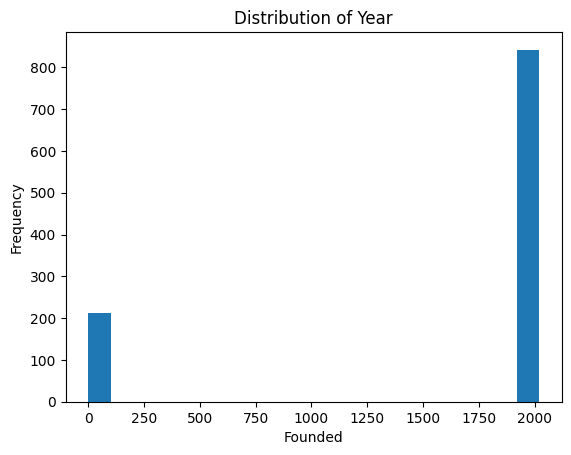

In [474]:
data_2020['Founded'] = pd.to_numeric(data_2020['Founded'], errors='coerce')

data_2020['Founded'] = data_2020['Founded'].fillna(0)
plt.hist(data_2020['Founded'], bins=20)
plt.title('Distribution of Year')
plt.xlabel('Founded')
plt.ylabel('Frequency')
plt.show()

In [475]:
data_2020['Founded'].replace(0, np.nan, inplace=True)
data_2020['Founded'].fillna(data_2020['Founded'].median(), inplace=True)

data_2020['Founded'] = data_2020['Founded'].astype(int)

In [476]:
data_2020.rename(columns={'Amount': 'Amount($)'}, inplace=True)

In [477]:
data_2020['Amount($)'].replace('', np.nan, inplace=True)
data_2020['Amount($)'] = data_2020['Amount($)'].replace('undisclosed', np.nan)

# if it is not already a string, convert it to string
if data_2020['Amount($)'].dtype != 'object':
    data_2020['Amount($)'] = data_2020['Amount($)'].astype(str)

# # remove non-numeric characters from the 'Amount' column
data_2020['Amount($)'] = data_2020['Amount($)'].str.replace('[^\d\.]', '', regex=True)

data_2020['Amount($)'] = pd.to_numeric(data_2020['Amount($)'], errors='coerce')

In [478]:
data_2020['Amount($)'].unique()

array([2.0000000e+05, 1.0000000e+05,           nan, 4.0000000e+05,
       3.4000000e+05, 6.0000000e+05, 4.5000000e+07, 1.0000000e+06,
       2.0000000e+06, 1.2000000e+06, 6.6000000e+08, 1.2000000e+05,
       7.5000000e+06, 5.0000000e+06, 5.0000000e+05, 3.0000000e+06,
       1.0000000e+07, 1.4500000e+08, 1.0000000e+08, 2.1000000e+07,
       4.0000000e+06, 2.0000000e+07, 5.6000000e+05, 2.7500000e+05,
       4.5000000e+06, 1.5000000e+07, 3.9000000e+08, 7.0000000e+06,
       5.1000000e+06, 7.0000000e+08, 2.3000000e+06, 7.0000000e+05,
       1.9000000e+07, 9.0000000e+06, 4.0000000e+07, 7.5000000e+05,
       1.5000000e+06, 7.8000000e+06, 5.0000000e+07, 8.0000000e+07,
       3.0000000e+07, 1.7000000e+06, 2.5000000e+06, 4.0000000e+04,
       3.3000000e+07, 3.5000000e+07, 3.0000000e+05, 2.5000000e+07,
       3.5000000e+06, 2.0000000e+08, 6.0000000e+06, 1.3000000e+06,
       4.1000000e+06, 5.7500000e+05, 8.0000000e+05, 2.8000000e+07,
       1.8000000e+07, 3.2000000e+06, 9.0000000e+05, 2.5000000e

In [479]:
data_2020[(data_2020['Amount($)'].isna() == True)]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed
7,Metvy,2018,Gurugram,Networking platform,AI driven networking platform for individuals ...,Shawrya Mehrotra,HostelFund,NaN,Pre-series
11,Medfin,2017,Bangalore,HealthTech,Medfin is a Discovery platform for medical pro...,"Arjun Kumar, Arun Kumar, Sidharth Gurjar","Axilor Ventures, S.D. Shibulal",NaN,Series A
12,MasterG,2015,Delhi,Fashion startup,MasterG is a design and skill development orga...,Gayatri Jolly,Acumen Fund's angel programme,NaN,Series A
18,Pine Labs,1998,Noida,FinTech,A merchant platform company that provides fina...,Amrish Rau,"Mastercard, Temasek Holdings",NaN,Series A
...,...,...,...,...,...,...,...,...,...
1023,Skilancer,2016,Noida,Technology,Solar module cleaning system [MCS] providers,Neeraj Kumar,Venture Catalysts,NaN,Series A
1024,Harappa Education,2016,Delhi,Edtech,Provides online courses on foundational skills,Pramath Raj Sinha,James Murdoch-led Lupa Systems,NaN,Series A
1028,PayMart,2015,Chandigarh,Fintech,Provides cardless cash withdrawals through sma...,Amit Narang,"IIM Ahmedabad’s incubator (CIIE.CO),Chandigarh...",NaN,Series A
1040,BuildPan,2019,Indore,SaaS,"It helps developers to test, integrate and dep...","Sonal Khandelwal, Vaibhav Tiwari","HNIs in India, Japan, and the US",NaN,Seed Round


Before I impute the missing values for amount, let's have a look at the distribution first 

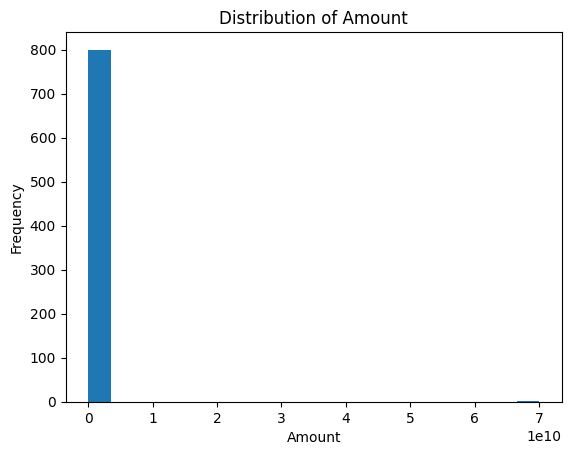

In [480]:
plt.hist(data_2020['Amount($)'], bins=20)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [481]:
data_2020['Amount($)'].fillna(data_2020['Amount($)'].median(),inplace=True )
data_2020.isna().sum()

Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount($)        0
Stage            0
dtype: int64

In [482]:
data_2020['Sector1'] = 'Other'
data_2020.loc[data_2020['Sector'].str.contains('|'.join(tech)), 'Sector1'] = 'Technology'
data_2020.loc[data_2020['Sector'].str.contains('|'.join(fin)), 'Sector1'] = 'Finance'
data_2020.loc[data_2020['Sector'].str.contains('|'.join(health)), 'Sector1'] = 'Healthcare'
data_2020.loc[data_2020['Sector'].str.contains('|'.join(mkt)), 'Sector1'] = 'Marketing'
data_2020.loc[data_2020['Sector'].str.contains('|'.join(agric)), 'Sector1'] = 'Agriculture'
data_2020.loc[data_2020['Sector'].str.contains('|'.join(econ)), 'Sector1'] = 'E-Commerce'
data_2020.loc[data_2020['Sector'].str.contains('|'.join(edu)), 'Sector1'] = 'Education'
data_2020.loc[data_2020['Sector'].str.contains('|'.join(welln)), 'Sector1'] = 'Wellness/Beauty'
data_2020.loc[data_2020['Sector'].str.contains('|'.join(real_est)), 'Sector1'] = 'Real Estate'
data_2020.loc[data_2020['Sector'].str.contains('|'.join(log)), 'Sector1'] = 'Logistics'

data_2020.loc[data_2020['Sector'].str.contains('|'.join(auto)), 'Sector1'] = 'Automotive'
data_2020.loc[data_2020['Sector'].str.contains('|'.join(manu)), 'Sector1'] = 'Manufacture'
data_2020.loc[data_2020['Sector'].str.contains('|'.join(ener)), 'Sector1'] = 'Energy'
data_2020.loc[data_2020['Sector'].str.contains('|'.join(medi)), 'Sector1'] = 'Media/Entertainment'
data_2020.loc[data_2020['Sector'].str.contains('|'.join(hos)), 'Sector1'] = 'Hospitality'
data_2020.loc[data_2020['Sector'].str.contains('|'.join(style)), 'Sector1'] = 'Lifestyle'
data_2020.loc[data_2020['Sector'].str.contains('|'.join(cons)), 'Sector1'] = 'Consumer Services'
data_2020.loc[data_2020['Sector'].str.contains('|'.join(game)), 'Sector1'] = 'Gaming'
data_2020.loc[data_2020['Sector'].str.contains('|'.join(fint)), 'Sector1'] = 'FinTech'
data_2020.loc[data_2020['Sector'].str.contains('|'.join(con)), 'Sector1'] = 'Consumables'

In [483]:
data_2020.drop('Sector',axis=1,inplace=True)
data_2020= data_2020.rename(columns={'Sector1': 'Sector'})

In [484]:
data_2020.isna().sum()

Company_Brand    0
Founded          0
HeadQuarter      0
What_it_does     0
Founders         0
Investor         0
Amount($)        0
Stage            0
Sector           0
dtype: int64

In [485]:
data_2020['Year']=2020

In [486]:
data_2020.head()

,Company_Brand,Founded,HeadQuarter,What_it_does,Founders,Investor,Amount($),Stage,Sector,Year
0,Aqgromalin,2019,Chennai,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,Series A,Technology,2020
1,Krayonnz,2019,Bangalore,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,Education,2020
2,PadCare Labs,2018,Pune,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,3000000.0,Pre-seed,Healthcare,2020
3,NCOME,2020,Delhi,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,Series A,Finance,2020
4,Gramophone,2016,Indore,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,Series A,Technology,2020


### 2021 data cleaning

In [487]:
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [488]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [489]:
data_2021.isna().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

In [490]:
data_2021['Year']= 2021

In [491]:
data_2021.Stage.unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       '$1200000', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

There are values in the stage column that rather needs to be in the 'Amount($)' column

In [492]:
# First rename the amount column
data_2021 = data_2021.rename(columns={'Amount': 'Amount($)'})

mask = (~data_2021['Stage'].isna()) & data_2021['Stage'].str.contains('\$')
data_2021.loc[mask, 'Amount($)'] = data_2021.loc[mask, 'Stage']
data_2021.loc[mask, 'Stage'] = ''

mask = (~data_2021['Investor'].isna()) & data_2021['Investor'].str.contains('\$')
data_2021.loc[mask, 'Amount($)'] = data_2021.loc[mask, 'Investor']
data_2021.loc[mask, 'Investor'] = ''

In [493]:
data_2021['HeadQuarter'].ffill(inplace=True)

data_2021['Stage'] = data_2021['Stage'].fillna(data_2021['Stage'].mode()[0])

data_2021['Investor'] = data_2021['Investor'].fillna(data_2021['Investor'].mode()[0])
                                                   
data_2021['Founders'] = data_2021['Founders'].fillna(data_2021['Founders'].mode()[0])

data_2021['HeadQuarter'] = data_2021['HeadQuarter'].str.replace('New Delhi', 'Delhi')
data_2021['HeadQuarter'] = data_2021['HeadQuarter'].str.replace('Gurgaon', 'Gurugram')

In [494]:
data_2021.isna().sum()

Company_Brand    0
Founded          1
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount($)        1
Stage            0
Year             0
dtype: int64

In [495]:
data_2021 = data_2021.drop(111)

data_2021 = data_2021.drop(256)

data_2021.loc[902, 'Investor'] = np.nan

data_2021.loc[59, 'Investor'] = np.nan

data_2021.loc[1100, 'Investor'] = np.nan

data_2021.loc[1148, 'Investor'] = np.nan

In [496]:
data_2021['HeadQuarter'].ffill(inplace=True)

data_2021['Stage'] = data_2021['Stage'].fillna(data_2021['Stage'].mode()[0])

data_2021['Investor'] = data_2021['Investor'].fillna(data_2021['Investor'].mode()[0])

data_2021['Founders'] = data_2021['Founders'].fillna(data_2021['Founders'].mode()[0])

data_2021['HeadQuarter'] = data_2021['HeadQuarter'].str.replace('New Delhi', 'Delhi')

data_2021['HeadQuarter'] = data_2021['HeadQuarter'].str.replace('Gurgaon', 'Gurugram')

In [497]:
data_2021['Amount($)'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [498]:
incorrect_values = ['Undisclosed', 'Seed', '$']
data_2021['Amount($)'] = data_2021['Amount($)'].replace(incorrect_values, np.nan)

# Function to clean the 'Amount($)' values, if needed
def clean_amount(value):
    if isinstance(value, str):
        # Remove non-numeric characters except for the decimal point
        return ''.join(c for c in value if c.isdigit() or c == '.')
    return value

# Apply the cleaning function to the 'Amount($)' column
data_2021['Amount($)'] = data_2021['Amount($)'].apply(clean_amount)

# Convert to numeric, coercing errors to NaN
data_2021['Amount($)'] = pd.to_numeric(data_2021['Amount($)'], errors='coerce')

print(data_2021['Amount($)'].unique())


[1.20e+06 1.20e+08 3.00e+07 5.10e+07 2.00e+06 1.88e+08 2.00e+05      nan
 1.00e+06 3.00e+06 1.00e+05 7.00e+05 9.00e+06 4.00e+07 4.90e+07 4.00e+05
 3.00e+05 2.50e+07 1.60e+08 1.50e+05 1.80e+06 5.00e+06 8.50e+05 5.30e+07
 5.00e+05 1.10e+06 6.00e+06 8.00e+05 1.00e+07 2.10e+07 7.50e+06 2.60e+07
 7.40e+06 1.50e+06 6.00e+05 8.00e+08 1.70e+07 3.50e+06 1.50e+07 2.15e+08
 2.50e+06 3.50e+08 5.50e+06 8.30e+07 1.10e+08 5.00e+08 6.50e+07 1.50e+11
 3.00e+08 2.20e+06 3.50e+07 1.40e+08 4.00e+06 1.30e+07 9.50e+06 8.00e+06
 1.20e+07 1.70e+06 1.50e+08 1.00e+08 2.25e+08 6.70e+06 1.30e+06 2.00e+07
 2.50e+05 5.20e+07 3.80e+06 1.75e+07 4.20e+07 2.30e+06 7.00e+06 4.50e+08
 2.80e+07 8.50e+06 3.70e+07 3.70e+08 1.60e+07 4.40e+07 7.70e+05 1.25e+08
 5.00e+07 4.90e+06 1.45e+08 2.20e+07 7.00e+07 6.60e+06 3.20e+07 2.40e+07
 7.25e+05 4.61e+05 9.60e+07 6.00e+07 2.66e+08 4.50e+06 3.25e+08 6.50e+06
 1.60e+06 2.25e+05 8.50e+07 2.35e+05 2.60e+05 2.90e+06 8.60e+07 1.30e+05
 1.00e+04 1.11e+08 2.65e+05 7.60e+07 7.50e+07 1.00e

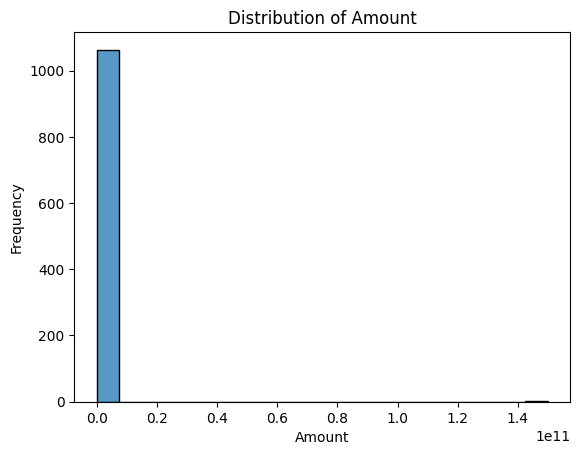

In [499]:
sns.histplot(data_2021['Amount($)'], bins=20)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

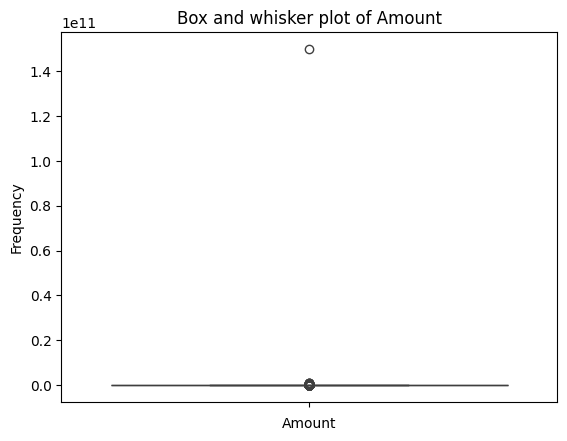

In [500]:
sns.boxplot(data_2021['Amount($)'])
plt.title('Box and whisker plot of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

Since the 'Amount($)' column has outliers, I go ahead to use the median to fill in the missing values

In [501]:
data_2021['Amount($)'].fillna(data_2021['Amount($)'].median(), inplace=True)

In [502]:
data_2021.isna().sum()

Company_Brand    0
Founded          1
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
dtype: int64

In [503]:
data_2021['Founded']=data_2021['Founded'].dropna()

In [504]:
data_2021['Sector_clean'] = 'Other'
data_2021.loc[data_2021['Sector'].str.contains('|'.join(tech)), 'Sector_clean'] = 'Technology'
data_2021.loc[data_2021['Sector'].str.contains('|'.join(fin)), 'Sector_clean'] = 'Finance'
data_2021.loc[data_2021['Sector'].str.contains('|'.join(health)), 'Sector_clean'] = 'Healthcare'
data_2021.loc[data_2021['Sector'].str.contains('|'.join(mkt)), 'Sector_clean'] = 'Marketing'
data_2021.loc[data_2021['Sector'].str.contains('|'.join(agric)), 'Sector_clean'] = 'Agriculture'
data_2021.loc[data_2021['Sector'].str.contains('|'.join(econ)), 'Sector_clean'] = 'E-Commerce'
data_2021.loc[data_2021['Sector'].str.contains('|'.join(edu)), 'Sector_clean'] = 'Education'
data_2021.loc[data_2021['Sector'].str.contains('|'.join(welln)), 'Sector_clean'] = 'Wellness/Beauty'
data_2021.loc[data_2021['Sector'].str.contains('|'.join(real_est)), 'Sector_clean'] = 'Real Estate'
data_2021.loc[data_2021['Sector'].str.contains('|'.join(log)), 'Sector_clean'] = 'Logistics'

data_2021.loc[data_2021['Sector'].str.contains('|'.join(auto)), 'Sector_clean'] = 'Automotive'
data_2021.loc[data_2021['Sector'].str.contains('|'.join(manu)), 'Sector_clean'] = 'Manufacture'
data_2021.loc[data_2021['Sector'].str.contains('|'.join(ener)), 'Sector_clean'] = 'Energy'
data_2021.loc[data_2021['Sector'].str.contains('|'.join(medi)), 'Sector_clean'] = 'Media/Entertainment'
data_2021.loc[data_2021['Sector'].str.contains('|'.join(hos)), 'Sector_clean'] = 'Hospitality'
data_2021.loc[data_2021['Sector'].str.contains('|'.join(style)), 'Sector_clean'] = 'Lifestyle'
data_2021.loc[data_2021['Sector'].str.contains('|'.join(cons)), 'Sector_clean'] = 'Consumer Services'
data_2021.loc[data_2021['Sector'].str.contains('|'.join(game)), 'Sector_clean'] = 'Gaming'
data_2021.loc[data_2021['Sector'].str.contains('|'.join(fint)), 'Sector_clean'] = 'FinTech'
data_2021.loc[data_2021['Sector'].str.contains('|'.join(con)), 'Sector_clean'] = 'Consumables'

In [505]:
data_2021['HeadQuarter'] = data_2021['HeadQuarter'].replace('Food & Beverages', np.nan)
data_2021['HeadQuarter'] = data_2021['HeadQuarter'].replace('Pharmaceuticals\t#REF!', np.nan)
data_2021['HeadQuarter'] = data_2021['HeadQuarter'].replace('Online Media#REF!', np.nan)
data_2021.loc[98, 'HeadQuarter'] = np.nan
data_2021.loc[1100, 'HeadQuarter'] = np.nan

data_2021['HeadQuarter'] = data_2021['HeadQuarter'].replace('Gurugram\t#REF!', 'Gurugram')
data_2021['HeadQuarter'] = data_2021['HeadQuarter'].replace('Information Technology & Services', 'Manchester')
data_2021['HeadQuarter'] = data_2021['HeadQuarter'].replace('Mountain View, CA', 'California')
data_2021['HeadQuarter'] = data_2021['HeadQuarter'].replace('Faridabad, Haryana', 'Haryana')
data_2021['HeadQuarter'] = data_2021['HeadQuarter'].replace('Small Towns, Andhra Pradesh', 'Andhra Pradesh')


data_2021['HeadQuarter'] = data_2021['HeadQuarter'].fillna(data_2021['HeadQuarter'].mode()[0])
# filling the gaps with appropriate naming convention

data_2021['Sector'] = data_2021['Sector'].replace('Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.', 'Healthcare')
data_2021['Sector'] = data_2021['Sector'].replace('Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.', 'Healthcare')   
data_2021['Sector'] = data_2021['Sector'].replace('MoEVing is Indias only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.', 'Energy')

In [506]:
data_2021.drop(['Sector'], axis=1)
data_2021= data_2021.rename(columns={'Sector_clean': 'Sector'})

In [507]:
data_2021.isna().sum()

Company_Brand    0
Founded          1
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
Sector           0
dtype: int64